# Simulation eines Abstandssensors mit linearer Kennlinie

## Erzeugen von Zufallszahlen

In [1]:
# pip install numpy
# conda install numpy

In [2]:
import numpy

In [3]:
A = numpy.random.normal(loc=3, scale=1.0, size=10000)

In [4]:
A

array([4.00137881, 3.30038622, 1.44000047, ..., 3.36915996, 1.09931037,
       3.45466368])

In [5]:
# pip install matplotlib
# conda install matplotlib

In [6]:
import matplotlib.pyplot as plt

In [7]:
numpy.mean(A)

2.9918319672800795

In [8]:
numpy.std(A)

0.9946090093258793

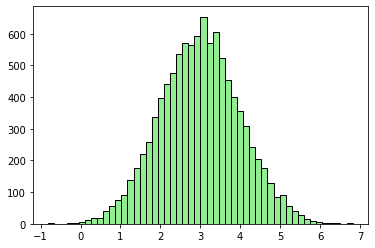

In [9]:
r = plt.hist(A, bins=50, edgecolor="black", color="lightgreen")
plt.show()

In [10]:
r

(array([  2.,   0.,   0.,   2.,   4.,   5.,  11.,  19.,  18.,  40.,  56.,
         74.,  91., 137., 177., 222., 257., 336., 398., 443., 475., 537.,
        570., 566., 594., 654., 570., 606., 524., 455., 399., 357., 308.,
        244., 205., 176., 130.,  85.,  90.,  56.,  42.,  29.,  14.,   8.,
          6.,   4.,   1.,   2.,   0.,   1.]),
 array([-0.80774623, -0.65522373, -0.50270122, -0.35017872, -0.19765622,
        -0.04513372,  0.10738878,  0.25991129,  0.41243379,  0.56495629,
         0.71747879,  0.8700013 ,  1.0225238 ,  1.1750463 ,  1.3275688 ,
         1.4800913 ,  1.63261381,  1.78513631,  1.93765881,  2.09018131,
         2.24270382,  2.39522632,  2.54774882,  2.70027132,  2.85279382,
         3.00531633,  3.15783883,  3.31036133,  3.46288383,  3.61540634,
         3.76792884,  3.92045134,  4.07297384,  4.22549634,  4.37801885,
         4.53054135,  4.68306385,  4.83558635,  4.98810886,  5.14063136,
         5.29315386,  5.44567636,  5.59819886,  5.75072137,  5.90324387,
 

## Eine Sensorklasse

In [11]:
class sensor_lineare_kennlinie:
    
    def __init__(self, bias, noise):
        self.bias = bias
        self.noise = noise
        
    def get_sensorwert(self, e):
        sensorwert = e + numpy.random.normal(loc=self.bias, scale=self.noise)
        return sensorwert
    
    
    def zeige_sensor_kurve(self):
        
        sensorwerte = []
        for e in range(0,101):
            sensorwert = self.get_sensorwert(e)
            sensorwerte.append( sensorwert )
            
        plt.plot(sensorwerte)
        plt.xlabel("Tatsächliche Entfernung (cm)")
        plt.ylabel("Sensorwert")
        plt.show()

In [12]:
s1 = sensor_lineare_kennlinie(-20, 1.0)

In [13]:
s1.get_sensorwert(100)

82.29751967085633

In [14]:
s2 = sensor_lineare_kennlinie(-5, 3.0)

In [15]:
s2.get_sensorwert(100)

93.81149417448448

## Sensorkurven

In [16]:
sensorwerte = []
for e in range(0,101):
    sensorwert = s1.get_sensorwert(e)
    sensorwerte.append( sensorwert )

In [17]:
len(sensorwerte)

101

In [18]:
sensorwerte[0:5]

[-19.66858387229074,
 -18.10493216096723,
 -15.860544814831826,
 -16.305541793117925,
 -15.618891311599175]

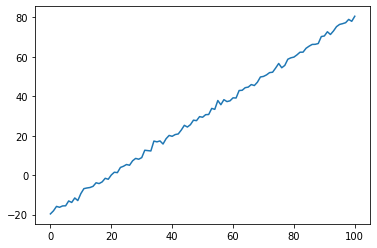

In [19]:
plt.plot(sensorwerte)
plt.show()

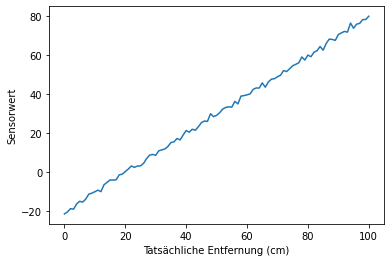

In [20]:
s1.zeige_sensor_kurve()

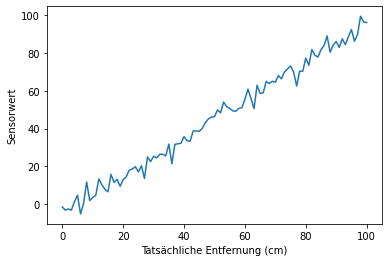

In [21]:
s2.zeige_sensor_kurve()

# Erste Fusionsansätze

## Fehlerfunktion für Fusionsergebnisse

In [22]:
gw = numpy.array([1,2,3,4,5]) # gw=Grundwahrheit, gt=Ground Truth
fusionsergebnisse = numpy.array([1.1, 2.2, 2.9, 4.05, 5.9])

In [23]:
gw

array([1, 2, 3, 4, 5])

In [24]:
fusionsergebnisse

array([1.1 , 2.2 , 2.9 , 4.05, 5.9 ])

In [25]:
gw - fusionsergebnisse

array([-0.1 , -0.2 ,  0.1 , -0.05, -0.9 ])

In [26]:
numpy.mean(abs(gw - fusionsergebnisse))

0.27000000000000013

In [27]:
def MAE(gw, fusionsergebnisse):
    return numpy.mean( abs(numpy.array(gw) - numpy.array(fusionsergebnisse)) )

In [28]:
MAE(gw, fusionsergebnisse)

0.27000000000000013

In [29]:
%who

A	 MAE	 e	 fusionsergebnisse	 gw	 numpy	 plt	 r	 s1	 
s2	 sensor_lineare_kennlinie	 sensorwert	 sensorwerte	 


In [30]:
%whos

Variable                   Type                        Data/Info
----------------------------------------------------------------
A                          ndarray                     10000: 10000 elems, type `float64`, 80000 bytes
MAE                        function                    <function MAE at 0x7f22975558b0>
e                          int                         100
fusionsergebnisse          ndarray                     5: 5 elems, type `float64`, 40 bytes
gw                         ndarray                     5: 5 elems, type `int64`, 40 bytes
numpy                      module                      <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
plt                        module                      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
r                          tuple                       n=3
s1                         sensor_lineare_kennlinie    <__main__.sensor_lineare_<...>object at 0x7f2297784760>
s2                         sensor_lineare_kenn

## Auswertung für Sensor 1 und Sensor 2

In [31]:
def erzeuge_messreihe(s,N):
    
    gw = []
    sensorwerte = []
    
    for e in range(0,N):
        sensorwert = s.get_sensorwert(e)
        gw.append(e)
        sensorwerte.append( sensorwert )
        
    return numpy.array(gw), numpy.array(sensorwerte)

In [32]:
gw, sensorwerte = erzeuge_messreihe(s1, 1000)
MAE(gw, sensorwerte)

19.98185146998636

In [33]:
gw[0:5]

array([0, 1, 2, 3, 4])

In [34]:
sensorwerte[0:5]

array([-21.49400902, -18.06632431, -16.89138672, -18.15725461,
       -15.33154515])

In [35]:
gw, sensorwerte = erzeuge_messreihe(s2, 1000)
MAE(gw, sensorwerte)

5.038935831363044

## Sensorfusion über eine einfache Mittelwertbildung

In [36]:
gw, sensorwerte1 = erzeuge_messreihe(s1, 1000)
gw, sensorwerte2 = erzeuge_messreihe(s2, 1000)

In [37]:
sensorwerte1[0:5]

array([-20.73669365, -19.65266113, -16.07445757, -16.43592266,
       -13.96465021])

In [38]:
sensorwerte2[0:5]

array([ -0.83041175, -10.04224208,  -3.02207611,  -1.54507274,
        -0.14752616])

In [39]:
fusionsergebnisse = (sensorwerte1+sensorwerte2) / 2

In [40]:
type(fusionsergebnisse)

numpy.ndarray

In [41]:
fusionsergebnisse[0:5]

array([-10.7835527 , -14.84745161,  -9.54826684,  -8.9904977 ,
        -7.05608819])

In [42]:
MAE(gw, fusionsergebnisse)

12.415559047336014

**Fazit: Eine einfache Mittelwertbildung bringt es nicht!**

## Sensorfusion mit Biaskorrektur und Mittelwertbildung

In [43]:
def ME(gw, fusionsergebnisse):
    return numpy.mean(gw - fusionsergebnisse)

In [44]:
bias1 = ME(gw, sensorwerte1)
bias1

19.993522228892203

In [45]:
bias2 = ME(gw, sensorwerte2)
bias2

4.83759586577982

In [46]:
fusionsergebnisse2 = ((sensorwerte1+bias1) + (sensorwerte2+bias2)) / 2

In [47]:
fusionsergebnisse2[0:5]

array([ 1.63200635, -2.43189256,  2.86729221,  3.42506135,  5.35947086])

In [48]:
MAE(gw, fusionsergebnisse2)

1.274449840959267

Ohne Mittelwerbildung? Nur Verwenden der Sensordaten von Sensor 1 oder Sensor 2?

In [49]:
fusionsergebnisse3 = sensorwerte1+bias1

In [50]:
MAE(gw, fusionsergebnisse3)

0.800217171159258

In [51]:
fusionsergebnisse4 = sensorwerte2+bias2

In [52]:
MAE(gw, fusionsergebnisse4)

2.3762574251476716

# Simulation eines Abstandssensors mit nicht-linearer Kennlinie

## Der Logarithmus ist eine nicht-lineare Funktion

In [53]:
x = numpy.arange(1,1001)

In [54]:
x[:100]

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [55]:
y = numpy.log(x)

In [56]:
y[:100]

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509,
       2.39789527, 2.48490665, 2.56494936, 2.63905733, 2.7080502 ,
       2.77258872, 2.83321334, 2.89037176, 2.94443898, 2.99573227,
       3.04452244, 3.09104245, 3.13549422, 3.17805383, 3.21887582,
       3.25809654, 3.29583687, 3.33220451, 3.36729583, 3.40119738,
       3.4339872 , 3.4657359 , 3.49650756, 3.52636052, 3.55534806,
       3.58351894, 3.61091791, 3.63758616, 3.66356165, 3.68887945,
       3.71357207, 3.73766962, 3.76120012, 3.78418963, 3.80666249,
       3.8286414 , 3.8501476 , 3.87120101, 3.8918203 , 3.91202301,
       3.93182563, 3.95124372, 3.97029191, 3.98898405, 4.00733319,
       4.02535169, 4.04305127, 4.06044301, 4.07753744, 4.09434456,
       4.11087386, 4.12713439, 4.14313473, 4.15888308, 4.17438727,
       4.18965474, 4.20469262, 4.21950771, 4.2341065 , 4.24849524,
       4.26267988, 4.27666612, 4.29045944, 4.30406509, 4.31748

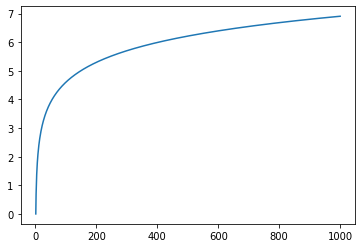

In [57]:
plt.plot(x,y)
#plt.scatter(x,y, marker="<")
plt.show()

## Eine neue Sensor-Klasse

In [58]:
class sensor_nichtlineare_kennlinie:
    
    def __init__(self, bias, noise):
        self.bias = bias
        self.noise = noise
        
    def get_sensorwert(self, e):
        sensorwert = e + numpy.random.normal(loc=self.bias, scale=self.noise) + 500*numpy.log(1+e)
        return sensorwert
    
    
    def zeige_sensor_kurve(self):
        
        sensorwerte = []
        for e in range(0,1001):
            sensorwert = self.get_sensorwert(e)
            sensorwerte.append( sensorwert )
            
        plt.plot(sensorwerte)
        plt.xlabel("Tatsächliche Entfernung (cm)")
        plt.ylabel("Sensorwert")
        plt.show()

In [59]:
s3 = sensor_nichtlineare_kennlinie(50,40)

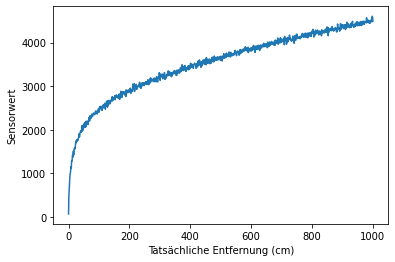

In [60]:
s3.zeige_sensor_kurve()

In [61]:
s4 = sensor_nichtlineare_kennlinie(-100,80)

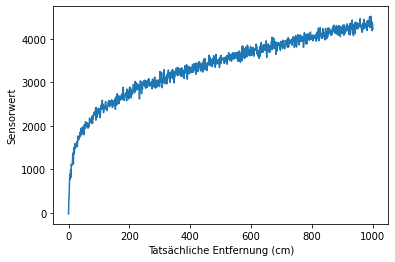

In [62]:
s4.zeige_sensor_kurve()

In [63]:
s4.get_sensorwert(60)

2021.8774327352364

# Neuer Fusionsansatz über Inverse Sensormodelle

## Inverses Sensormodell (ISM)

In [64]:
# Aufbauen einer LUT (Look-Up-Table):
# Sensorwert -> Entfernung (ISM)

ism_s4 = {}

for e in range(0,1001):

    sensorwerte = []
    for run in range(0,50):        
        sensorwert = s4.get_sensorwert( e )
        sensorwerte.append( sensorwert )
        
    mittlerer_sensorwert = numpy.mean( sensorwerte )
    
    ism_s4[mittlerer_sensorwert] = e

In [65]:
type(ism_s4)

dict

In [66]:
gw = [ism_s4[key] for key in ism_s4]
messwerte = [key for key in ism_s4]

In [67]:
gw[:5]

[0, 1, 2, 3, 4]

In [68]:
messwerte[:5]

[-90.08329690026044,
 253.94815169504167,
 454.6094340447138,
 597.7524687572806,
 710.3498020276803]

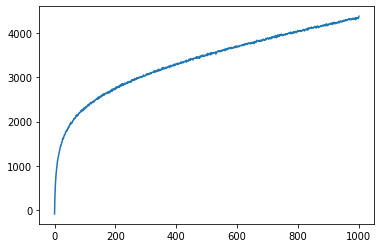

In [69]:
plt.plot(gw, messwerte)
plt.show()

In [70]:
# Suche nach einem ähnlichen Sensorwert in der LUT
sensorwert = 399
min_dist = None
best_key = None

for key in ism_s4:
    dist = abs(sensorwert - key)
    if best_key == None or dist < min_dist:
        best_key = key
        min_dist = dist

In [71]:
best_key

454.6094340447138

In [72]:
class ism:
    
    def __init__(self, s):
        self.sensor = s
        
    def baue_lut_auf(self):
        
        self.lut = {}
        for e in range(0,1001):

            sensorwerte = []
            for run in range(0,50):        
                sensorwert = self.sensor.get_sensorwert( e )
                sensorwerte.append( sensorwert )

            mittlerer_sensorwert = numpy.mean( sensorwerte )

            self.lut[mittlerer_sensorwert] = e
            
            
    def sensorwert_zu_entfernung(self, sensorwert):
        min_dist = None
        best_key = None

        for key in self.lut:
            dist = abs(sensorwert - key)
            if best_key == None or dist < min_dist:
                best_key = key
                min_dist = dist
                
        beste_entfernungs_schaetzung = self.lut[best_key]
        return beste_entfernungs_schaetzung

In [73]:
ism_s4 = ism(s4)

In [74]:
type(ism_s4)

__main__.ism

In [75]:
ism_s4.baue_lut_auf()

In [76]:
ein_sensorwert = s4.get_sensorwert(500)
ein_sensorwert

3447.2164027363724

In [77]:
ism_s4.sensorwert_zu_entfernung( ein_sensorwert )

481

## Sensordatenfusion über inverse Sensormodelle

In [78]:
s3 = sensor_nichtlineare_kennlinie(50,5)
s4 = sensor_nichtlineare_kennlinie(-100,20)

ism_s3 = ism(s3)
ism_s3.baue_lut_auf()

ism_s4 = ism(s4)
ism_s4.baue_lut_auf()

In [79]:
gw = []
fusions_ergebnisse = []

for e in range(0,1001):
    sensorwert_s3 = s3.get_sensorwert(e)
    sensorwert_s4 = s4.get_sensorwert(e)
    
    entfernungs_schaetzung_s3 = ism_s3.sensorwert_zu_entfernung( sensorwert_s3 )
    entfernungs_schaetzung_s4 = ism_s4.sensorwert_zu_entfernung( sensorwert_s4 )
    
    # Fall Nr 1.: Nur Sensor 3
    fusionierte_finale_entfernungs_schaetzung = entfernungs_schaetzung_s3
    
    # Fall Nr 2.: Nur Sensor 4
    #fusionierte_finale_entfernungs_schaetzung = entfernungs_schaetzung_s4
    
    # Fall Nr 3. Mittelwertbildung von Sensor 3 und Sensor 4
    # fusionierte_finale_entfernungs_schaetzung = (entfernungs_schaetzung_s3 + entfernungs_schaetzung_s4) / 2
    
    gw.append(e)
    fusions_ergebnisse.append( fusionierte_finale_entfernungs_schaetzung )

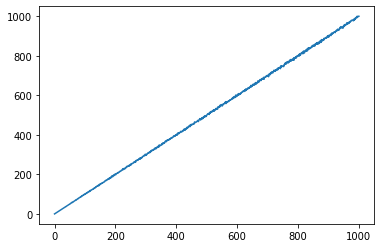

In [80]:
plt.plot(gw, fusions_ergebnisse)
plt.show()

In [81]:
MAE(gw, fusions_ergebnisse)

1.7792207792207793

| Fusionsart  | Ergebnis / MAE [cm] |
| ----------- | ----------- |
| Nur Sensor3 | 1.78        |
| Nur Sensor4 | 7.23        |
| Mittelung   | 3.72        |

**Fazit: Auch hier ist die Mittelwertbildung nicht hilfreich!**

# Simulation eines komplexeren Abstandssensors

## Komplexere Kennlinie erzeugen

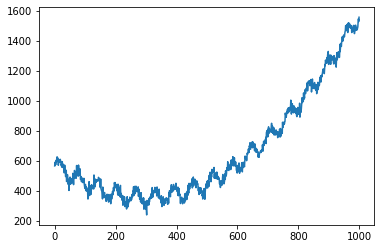

In [82]:
import matplotlib.pyplot as plt
import numpy
bias = -50
noise = 20
pos = 500
gw = []
sensorwerte = []
for e in range(0,1000):
    sensorwert = e + numpy.random.normal(loc=bias, scale=noise) + \
                 50*numpy.sin(e/10) + ((e-pos)/20)**2
    gw.append( e )
    sensorwerte.append( sensorwert )
plt.plot(gw,sensorwerte)
plt.show()

## Neue Sensorklasse

In [83]:
class sensor_complex:
    
    def __init__(self, bias, noise, pos):
        self.bias = bias
        self.noise = noise
        self.pos = pos
        
    def get_sensorwert(self, e):
        sensorwert = e + numpy.random.normal(loc=self.bias, scale=self.noise) + \
                    50*numpy.sin(e/10) + ((e-self.pos)/20)**2
        return sensorwert
    
    def zeige_sensor_kurve(self):
        
        sensorwerte = []
        for e in range(0,1001):
            sensorwert = self.get_sensorwert(e)
            sensorwerte.append( sensorwert )
            
        plt.plot(sensorwerte)
        plt.xlabel("Tatsächliche Entfernung (cm)")
        plt.ylabel("Sensorwert")
        plt.show()       

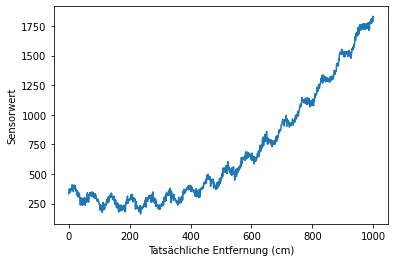

In [84]:
s5 = sensor_complex(-50,20,400)
s5.zeige_sensor_kurve()

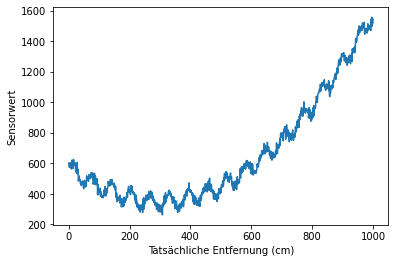

In [85]:
#s6 = sensor_complex(-50,20,800)
s6 = sensor_complex(-50,20,500)
s6.zeige_sensor_kurve()

# Eine lernende Sensordatenfusion

## Vorbereiten der Beispieldaten fürs Machine Learning

In [86]:
NR_EXAMPLE_DATA = 5000
X = numpy.zeros( (NR_EXAMPLE_DATA,2) )
Y = numpy.zeros( (NR_EXAMPLE_DATA,1) )

for run in range(0,NR_EXAMPLE_DATA):
    e = numpy.random.randint(low=0, high=1000)
    sensorwert_s5 = s5.get_sensorwert(e)
    sensorwert_s6 = s6.get_sensorwert(e)
    
    X[run,:] = numpy.array( [sensorwert_s5, sensorwert_s6] )
    Y[run,:] = e

In [87]:
X[:5]

array([[ 758.97567919,  676.21798056],
       [1733.96960851, 1493.9096579 ],
       [1751.16148486, 1489.01822747],
       [ 531.75091221,  493.47965199],
       [ 227.94109955,  416.99564525]])

In [88]:
Y[:5]

array([[636.],
       [983.],
       [993.],
       [555.],
       [158.]])

## Beispieldaten aufspalten in Trainingsdaten- und Testdaten

In [89]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [90]:
x_train.shape

(4000, 2)

In [91]:
y_train

array([[916.],
       [442.],
       [633.],
       ...,
       [243.],
       [ 28.],
       [101.]])

In [92]:
print( x_train[0], "-->", y_train[0] )

[1507.86514867 1259.01509008] --> [916.]


In [93]:
x_test.shape

(1000, 2)

In [94]:
y_test.shape

(1000, 1)

## Machine Learning mittels scikit-learn

In [95]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3, weights="uniform")


#from sklearn import tree
#model = tree.DecisionTreeRegressor()

model = model.fit(x_train, y_train)

## Testen der Modellgüte

In [96]:
input_vec = numpy.array( [214.92514233,  890.9374075] )
input_vec

array([214.92514233, 890.9374075 ])

In [97]:
type(input_vec)

numpy.ndarray

In [98]:
input_vec.shape

(2,)

In [99]:
input_vec.ndim

1

In [100]:
input_vec.reshape((1,2))

array([[214.92514233, 890.9374075 ]])

In [101]:
model.predict( input_vec.reshape(1,2) )

array([[15.]])

In [102]:
x_test.shape

(1000, 2)

In [103]:
y_test.shape

(1000, 1)

In [104]:
preds = model.predict( x_test )

In [105]:
preds[:10]

array([[923.        ],
       [153.        ],
       [735.33333333],
       [871.33333333],
       [ 64.        ],
       [484.33333333],
       [365.33333333],
       [194.33333333],
       [551.66666667],
       [842.66666667]])

In [106]:
y_test[:10]

array([[898.],
       [198.],
       [719.],
       [872.],
       [ 63.],
       [492.],
       [246.],
       [122.],
       [542.],
       [846.]])

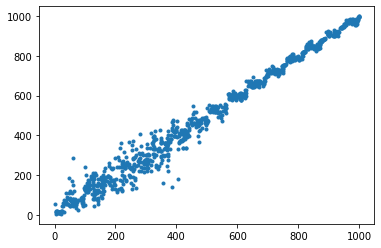

In [107]:
plt.scatter(y_test, preds, marker=".")
plt.show()

In [108]:
MAE(y_test, preds)

24.982333333333333

# Lernende Ansätze zur Sensordatenfusion bei unterschiedlichen Ranges

## Neue Sensorklasse mit Rangeangabe

In [178]:
class sensor_complex_range:
    
    def __init__(self, bias, noise, pos, fac):
        self.bias = bias
        self.noise = noise
        self.pos = pos
        self.fac = fac
        
    def get_sensorwert(self, e):
        sensorwert = self.fac * (e + numpy.random.normal(loc=self.bias, scale=self.noise) + \
                    50*numpy.sin(e/10) + ((e-self.pos)/20)**2)
        return sensorwert
    
    def zeige_sensor_kurve(self):
        
        sensorwerte = []
        for e in range(0,1001):
            sensorwert = self.get_sensorwert(e)
            sensorwerte.append( sensorwert )
            
        plt.plot(sensorwerte)
        plt.xlabel("Tatsächliche Entfernung (cm)")
        plt.ylabel("Sensorwert")
        plt.show()  

In [183]:
s7 = sensor_complex_range(-50,20,400,1)
s8 = sensor_complex_range(-50,20,800,1)

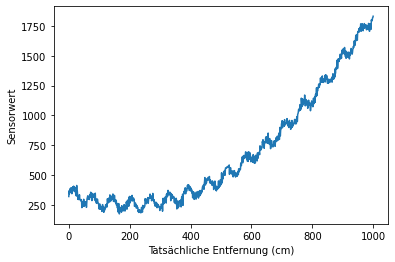

In [184]:
s7.zeige_sensor_kurve()

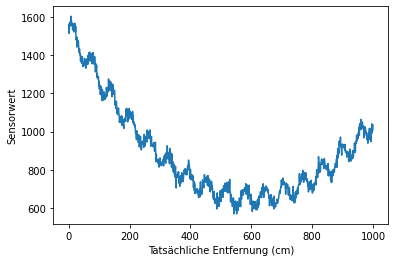

In [185]:
s8.zeige_sensor_kurve()

## Machine Learning Reloaded

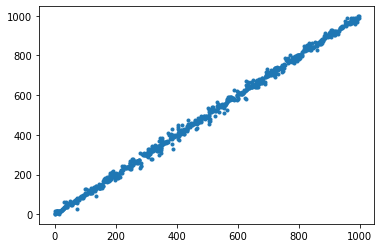

MAE= 8.565


In [186]:
# 1. Beispieldaten fürs ML vorbereiten
NR_EXAMPLE_DATA = 5000
X = numpy.zeros( (NR_EXAMPLE_DATA,2) )
Y = numpy.zeros( (NR_EXAMPLE_DATA,1) )

for run in range(0,NR_EXAMPLE_DATA):
    e = numpy.random.randint(low=0, high=1000)
    sensorwert_s7 = s7.get_sensorwert(e)
    sensorwert_s8 = s8.get_sensorwert(e)
    
    X[run,:] = numpy.array( [sensorwert_s7, sensorwert_s8] )
    Y[run,:] = e
    

# 2. Beispieldaten in Trainings- und Testdaten aufspalten
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=0)


# 3. Model erlernen
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3, weights="uniform")
model = model.fit(x_train, y_train)

# 4. Modellgüte bestimmen
preds = model.predict( x_test )
plt.scatter(y_test, preds, marker=".")
plt.show()
print( "MAE=", MAE(y_test, preds) )

## Normalisierung

In [118]:
D = numpy.array( [[-20, -2],
                  [-10, -1],
                  [  0,  0],
                  [+10,+ 1]])

In [119]:
D

array([[-20,  -2],
       [-10,  -1],
       [  0,   0],
       [ 10,   1]])

In [121]:
numpy.mean( D[:,0] )

-5.0

In [123]:
numpy.std( D[:,0] )

11.180339887498949

In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
D_std_scaled = scaler.fit_transform(D)

In [188]:
D_std_scaled

array([[-1.34164079, -1.34164079],
       [-0.4472136 , -0.4472136 ],
       [ 0.4472136 ,  0.4472136 ],
       [ 1.34164079,  1.34164079]])

In [189]:
numpy.std( D_std_scaled[:,1] )

1.0

In [190]:
numpy.mean( D_std_scaled[:,1] )

0.0

In [191]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
D_minmax_scaled = scaler.fit_transform(D)

In [192]:
D_minmax_scaled

array([[0.        , 0.        ],
       [0.33333333, 0.33333333],
       [0.66666667, 0.66666667],
       [1.        , 1.        ]])

In [193]:
D

array([[-20,  -2],
       [-10,  -1],
       [  0,   0],
       [ 10,   1]])

## Jetzt ML mit Skalierung der Sensordaten

In [210]:
def experiment_with_scaling(scaling_method, diagrams=False):
    
    # 1. Beispieldaten fürs ML vorbereiten
    NR_EXAMPLE_DATA = 5000
    X = numpy.zeros( (NR_EXAMPLE_DATA,2) )
    Y = numpy.zeros( (NR_EXAMPLE_DATA,1) )

    for run in range(0,NR_EXAMPLE_DATA):
        e = numpy.random.randint(low=0, high=1000)
        sensorwert_s7 = s7.get_sensorwert(e)
        sensorwert_s8 = s8.get_sensorwert(e)

        X[run,:] = numpy.array( [sensorwert_s7, sensorwert_s8] )
        Y[run,:] = e


    # 2. Beispieldaten in Trainings- und Testdaten aufspalten
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                        random_state=0)

    # 3. Skalierung der Traininsdaten
    if scaling_method == "standard":
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
    elif scaling_method == "minmax":
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform( x_train )

    # 4. Model erlernen
    from sklearn.neighbors import KNeighborsRegressor
    model = KNeighborsRegressor(n_neighbors=3, weights="uniform")
    model = model.fit(x_train_scaled, y_train)

    # 5. Modellgüte bestimmen
    x_test_scaled = scaler.transform( x_test )
    preds = model.predict( x_test_scaled )
    if diagrams:
        plt.scatter(y_test, preds, marker=".")
        plt.show()
    fehler = MAE(y_test, preds)
    print( f"{scaling_method} --> MAE=", fehler )
    
    return fehler

In [211]:
for scaling_method in ["standard", "minmax"]:
    alle_fehler = []
    for run in range(50):
        fehler = experiment_with_scaling( scaling_method )
        alle_fehler.append( fehler )
    exp_avg = numpy.mean( alle_fehler )
    print( f"Exp. average for {scaling_method}: {exp_avg}" )

standard --> MAE= 8.915333333333333
standard --> MAE= 8.424333333333331
standard --> MAE= 8.701333333333334
standard --> MAE= 8.455
standard --> MAE= 8.897666666666668
standard --> MAE= 8.633666666666668
standard --> MAE= 8.818666666666665
standard --> MAE= 8.659333333333336
standard --> MAE= 9.385333333333332
standard --> MAE= 8.677
standard --> MAE= 8.448333333333334
standard --> MAE= 8.550333333333333
standard --> MAE= 8.556
standard --> MAE= 8.902666666666667
standard --> MAE= 8.400333333333334
standard --> MAE= 8.675333333333334
standard --> MAE= 7.927333333333334
standard --> MAE= 8.734333333333336
standard --> MAE= 9.006666666666668
standard --> MAE= 8.472666666666667
standard --> MAE= 8.597666666666667
standard --> MAE= 9.217
standard --> MAE= 8.353333333333332
standard --> MAE= 9.179
standard --> MAE= 8.563
standard --> MAE= 8.738333333333332
standard --> MAE= 8.756333333333332
standard --> MAE= 8.611666666666665
standard --> MAE= 8.760333333333334
standard --> MAE= 9.143
stan

# Mehrere Sensoren erzeugen

In [141]:
bias = numpy.random.uniform(low=-100, high=100)
var  = numpy.random.uniform(low=1, high=100)
pos  = numpy.random.uniform(low=1, high=1000)
fac  = numpy.random.uniform(low=1, high=100)
bias, var, pos, fac

(70.7917840796654, 80.67816186033863, 828.1408094413662, 35.80090580442378)

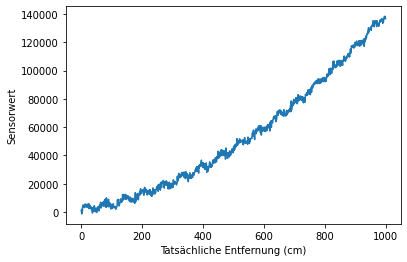

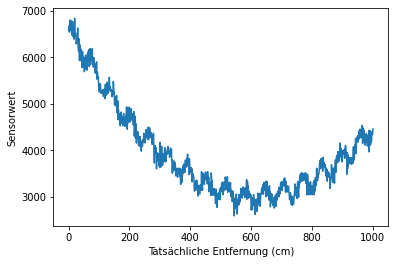

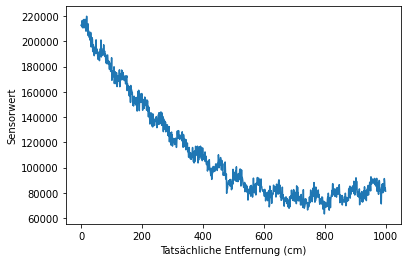

In [145]:
nr_sensors = 3
for sensor_nr in range(nr_sensors):
    bias = numpy.random.uniform(low=-100, high=100)
    std  = numpy.random.uniform(low=1, high=100)
    pos  = numpy.random.uniform(low=1, high=1000)
    fac  = numpy.random.uniform(low=1, high=100)
    s = sensor_complex_range(bias, std, pos, fac)
    s.zeige_sensor_kurve()

In [146]:
def erzeuge_sensoren(nr_sensors, diagrams=True):
    
    sensors = []
    for sensor_nr in range(nr_sensors):
        bias = numpy.random.uniform(low=-100, high=100)
        std  = numpy.random.uniform(low=1, high=100)
        pos  = numpy.random.uniform(low=1, high=1000)
        fac  = numpy.random.uniform(low=1, high=100)
        s = sensor_complex_range(bias, std, pos, fac)
        if diagrams:
            s.zeige_sensor_kurve()
        sensors.append( s )
        
    return sensors

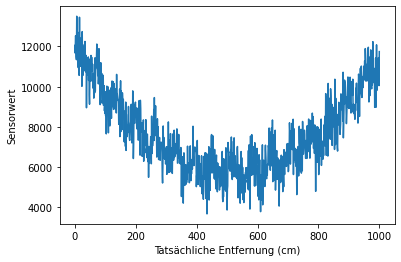

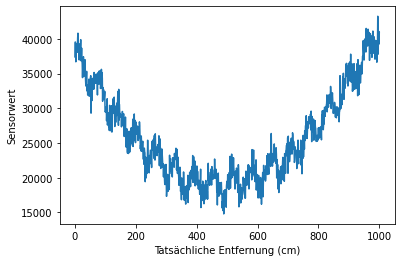

In [149]:
erzeuge_sensoren(2)

# Sensordatenfusion mit steigender Anzahl von Sensoren

## Eine Experimentfunktion

In [165]:
def experiment(nr_sensors, diagrams=False):
    
    # 1. Erzeuge Sensoren
    sensors = erzeuge_sensoren(nr_sensors, diagrams)
    
    # 2. Beispieldaten fürs ML vorbereiten
    NR_EXAMPLE_DATA = 5000
    X = numpy.zeros( (NR_EXAMPLE_DATA,nr_sensors) )
    Y = numpy.zeros( (NR_EXAMPLE_DATA,1) )

    for run in range(0,NR_EXAMPLE_DATA):
        e = numpy.random.randint(low=0, high=1000)
        
        for sensor_nr, sensor in enumerate(sensors):
            sensorwert = sensor.get_sensorwert(e)
            X[run,sensor_nr] = sensorwert
        
        Y[run,:] = e


    # 3. Beispieldaten in Trainings- und Testdaten aufspalten
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                        random_state=0)

    # 4. Skalierung der Traininsdaten
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform( x_train )
    

    # 5. Model erlernen
    from sklearn.neighbors import KNeighborsRegressor
    model = KNeighborsRegressor(n_neighbors=3, weights="uniform")
    model = model.fit(x_train_scaled, y_train)

    # 6. Modellgüte bestimmen
    x_test_scaled = scaler.transform( x_test )
    preds = model.predict( x_test_scaled )
    
    # 7. Scatterplot anzeigen?
    if diagrams:
        plt.scatter(y_test, preds, marker=".")
        plt.show()
    
    # 8. Fehler berechnen = Modellgüte ermitteln
    fehler = MAE(y_test, preds)
    print( f"nr_sensors={nr_sensors} --> MAE = {fehler:.2f}cm" )
    
    return fehler

In [163]:
experiment(2)

nr_sensors=2 --> MAE = 46.50cm


## Mehrere Experimente durchführen

In [173]:
ergebnisse_x = []
ergebnisse_y = []

for nr_sensors in range(2,20):
    
    alle_fehler = []
    for run in range(50):
        fehler = experiment(nr_sensors)
        alle_fehler.append(fehler)
        
    ergebnisse_x.append( nr_sensors )
    ergebnisse_y.append( numpy.mean(alle_fehler) )
    

nr_sensors=2 --> MAE = 56.13cm
nr_sensors=2 --> MAE = 35.20cm
nr_sensors=2 --> MAE = 19.91cm
nr_sensors=2 --> MAE = 16.41cm
nr_sensors=2 --> MAE = 18.88cm
nr_sensors=2 --> MAE = 33.80cm
nr_sensors=2 --> MAE = 19.88cm
nr_sensors=2 --> MAE = 22.66cm
nr_sensors=2 --> MAE = 40.56cm
nr_sensors=2 --> MAE = 15.72cm
nr_sensors=2 --> MAE = 65.02cm
nr_sensors=2 --> MAE = 22.84cm
nr_sensors=2 --> MAE = 31.60cm
nr_sensors=2 --> MAE = 10.57cm
nr_sensors=2 --> MAE = 44.12cm
nr_sensors=2 --> MAE = 4.25cm
nr_sensors=2 --> MAE = 33.47cm
nr_sensors=2 --> MAE = 7.73cm
nr_sensors=2 --> MAE = 31.88cm
nr_sensors=2 --> MAE = 20.98cm
nr_sensors=2 --> MAE = 32.33cm
nr_sensors=2 --> MAE = 1.75cm
nr_sensors=2 --> MAE = 16.34cm
nr_sensors=2 --> MAE = 11.98cm
nr_sensors=2 --> MAE = 13.58cm
nr_sensors=2 --> MAE = 14.19cm
nr_sensors=2 --> MAE = 14.30cm
nr_sensors=2 --> MAE = 24.04cm
nr_sensors=2 --> MAE = 19.36cm
nr_sensors=2 --> MAE = 6.89cm
nr_sensors=2 --> MAE = 17.05cm
nr_sensors=2 --> MAE = 19.99cm
nr_sensors=2

## Modellgüte in Abhängigkeit der Anzahl der Sensoren

In [174]:
ergebnisse_x

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [176]:
ergebnisse_y

[28.486013333333332,
 16.499793333333333,
 14.033466666666666,
 14.408386666666665,
 11.581206666666668,
 10.826286666666665,
 10.1478,
 10.216086666666666,
 9.609020000000001,
 9.023006666666667,
 8.986753333333334,
 9.102826666666667,
 9.3452,
 8.513126666666668,
 8.664526666666667,
 8.516546666666668,
 8.043640000000002,
 8.06986]

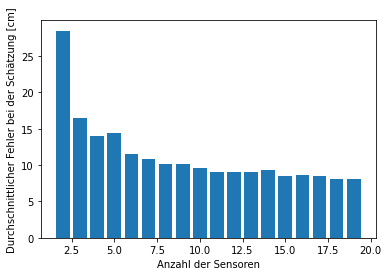

In [177]:
plt.bar( ergebnisse_x, ergebnisse_y )
plt.xlabel("Anzahl der Sensoren")
plt.ylabel("Durchschnittlicher Fehler bei der Schätzung [cm]")
plt.show()